<a href="https://colab.research.google.com/github/TechGovinda/NLP-Projects/blob/main/Amazon_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# /content/drive/MyDrive/end_end_Project /Sentiment Analysis/amazon_alexa.tsv

**IMPORTING ALL THE LIBRARY WHICH WE ARE GOING TO USE IN THIS PROJECT**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**EDA**

# Delimeter is used for seperate the fields in the CSV file.
Delimiter='\t' indicates that field is seperated by tab characters('\t').
delimiter =',' fields were separated by commas


In [ ]:
# load the dataset
# Delimeter is used for seperate the fields in the CSV file.
data = pd.read_csv('/content/drive/MyDrive/end_end_Project /Sentiment Analysis/amazon_alexa.tsv',delimiter='\t', quoting = 3)
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


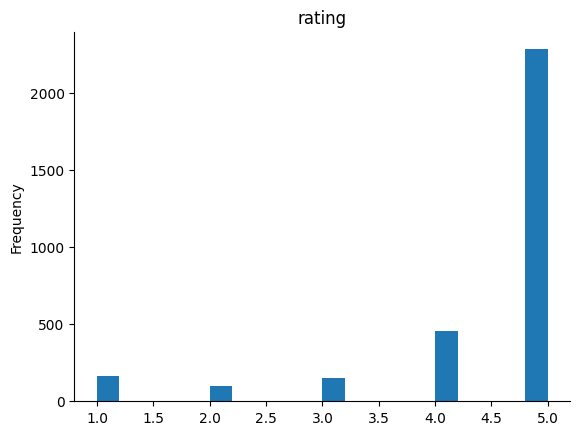

In [ ]:
# @title rating

from matplotlib import pyplot as plt
data['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print('Dataset Shape: ',data.shape)

Dataset Shape:  (3150, 5)


In [ ]:
# names of the field/column name
print('Feature name: ', data.columns.values)

Feature name:  ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [ ]:
# check null values
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [ ]:
# creating length of the reviews
data['verified_reviews'] = data['verified_reviews'].astype(str)
data['length']=data['verified_reviews'].apply(len)

In [ ]:
data.tail()

,rating,date,variation,verified_reviews,feedback,length
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1,52
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1,137
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1,443
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1,382
3149,4,29-Jul-18,Black Dot,Good,1,4


In [ ]:
# Randomly checking for the 10th record
print('verified_reviews: ',data.iloc[10]['verified_reviews'])   #original value
print('length of reviews: ',len(data.iloc[10]['verified_reviews']))   # length of review using len()
print(f"'length' column value: {data.iloc[10]['length']}") # value of column 'length'

verified_reviews:  "I sent it to my 85 year old Dad, and he talks to it constantly."
length of reviews:  65
'length' column value: 65


DataTypes of feature

In [ ]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object



1.ratinng,feedback,length are of integer type
2. date varification verified_reviews are of object type



**Analyzing 'rating' column**

In [ ]:
print(f"Rating value count:\n {data['rating'].value_counts()}")

Rating value count:
 rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64


Text(0, 0.5, 'Count')

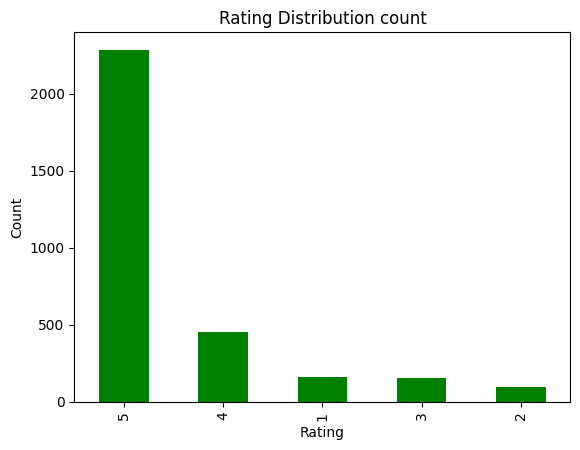

In [ ]:
# BAR chart of rating
data['rating'].value_counts().plot.bar(color='Green')
plt.title('Rating Distribution count')
plt.xlabel('Rating')
plt.ylabel('Count')

In [ ]:
print('Rating Value Count _ Percentage Distribution: \n',round(data['rating'].value_counts()/data.shape[0]*100,2))

Rating Value Count _ Percentage Distribution: 
 rating
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: count, dtype: float64


<Axes: ylabel='Percent'>

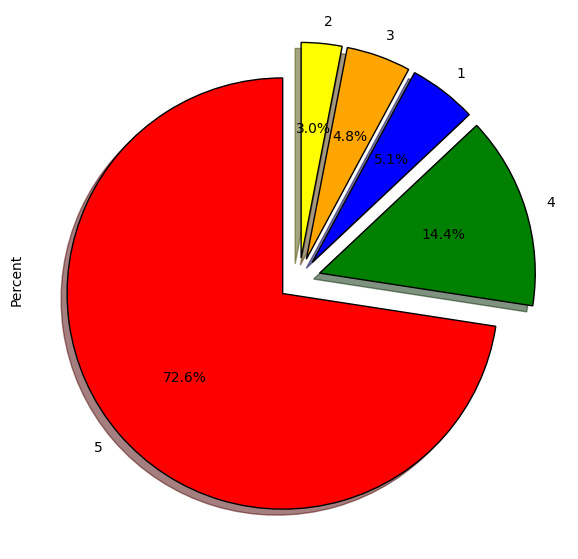

In [ ]:
fig =plt.figure(figsize=(7,7))
colors =('red','green','blue','orange','yellow')
tags = data['rating'].value_counts()/data.shape[0]
wp={'linewidth':1,'edgecolor':'black'}
explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct='%1.1f%%',shadow=True,colors=colors, startangle=90,wedgeprops=wp, explode=explode,label='Percent')

# from io import BytesIO
# graph = BytesIO()
# fig.savefig(graph,format='png')



**Analyzing 'Feedback' and its count**

In [ ]:
# Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     257
Name: count, dtype: int64


In [ ]:
review_0 = data[data['feedback']==0].iloc[0:]['verified_reviews']
print(review_0)

46      "It's like Siri, in fact, Siri answers more ac...
111     Sound is terrible if u want good music too get...
141                                    Not much features.
162     "Stopped working after 2 weeks ,didn't follow ...
176                                  Sad joke. Worthless.
                              ...                        
3047    Echo Dot responds to us when we aren't even ta...
3048                NOT CONNECTED TO MY PHONE PLAYLIST :(
3067    The only negative we have on this product is t...
3091                                    I didn’t order it
3096    The product sounded the same as the emoji spea...
Name: verified_reviews, Length: 257, dtype: object


In [ ]:
review_1=data[data['feedback']==1].iloc[0:]['verified_reviews']
print(review_1)

0                                           Love my Echo!
1                                               Loved it!
2       "Sometimes while playing a game, you can answe...
3       "I have had a lot of fun with this thing. My 4...
4                                                   Music
                              ...                        
3145    "Perfect for kids, adults and everyone in betw...
3146    "Listening to music, searching locations, chec...
3147    "I do love these things, i have them running m...
3148    "Only complaint I have is that the sound quali...
3149                                                 Good
Name: verified_reviews, Length: 2893, dtype: object


In [ ]:
# percentage Distribution of feedback
print(f"percentage Distribution of feedback with value count: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

percentage Distribution of feedback with value count: 
feedback
1    91.84
0     8.16
Name: count, dtype: float64


**Feedback Distribution**


*  91.84 reviews are positive
*  8.16 reviews are negative



<Axes: ylabel='Percent'>

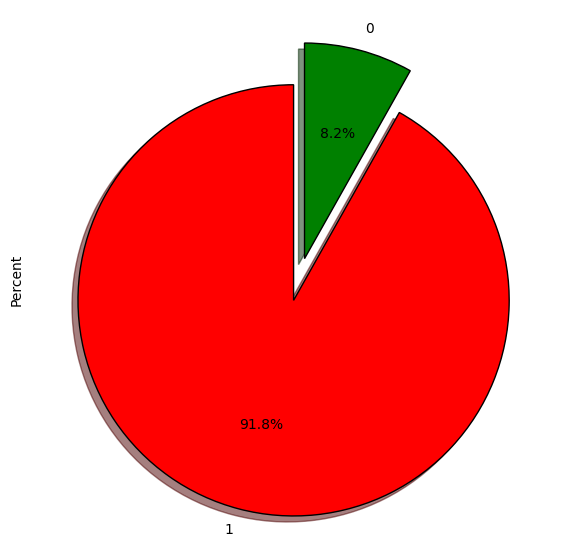

In [ ]:
fig =plt.figure(figsize=(7,7))
colors =('red','green')
tags = data['feedback'].value_counts()/data.shape[0]
wp={'linewidth':1,'edgecolor':'black'}
explode=(0.1,0.1)

tags.plot(kind='pie', autopct='%1.1f%%',shadow=True,colors=colors, startangle=90,wedgeprops=wp, explode=explode,label='Percent')



In [ ]:
# feedback =0
data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     96
Name: count, dtype: int64

In [ ]:
# feedback = 1
print('Rating: \n',data[data['feedback']==1]['rating'].value_counts())

Rating: 
 rating
5    2286
4     455
3     152
Name: count, dtype: int64


In [ ]:
print(data['variation'].value_counts())

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

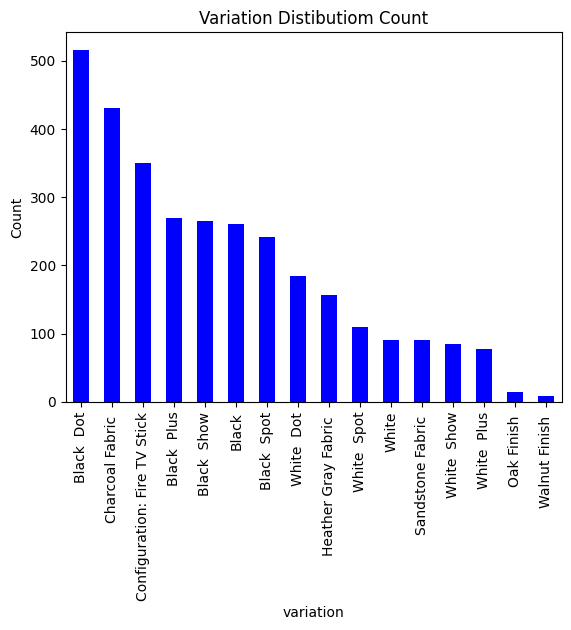

In [ ]:
# Bar graph to visual the total counts of each variation

data['variation'].value_counts().plot.bar(color='blue')
plt.title('Variation Distibutiom Count')
plt.xlabel('variation')
plt.ylabel('Count')
plt.show

MEAN rating according to variation

In [ ]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

lets analyze the above ratings



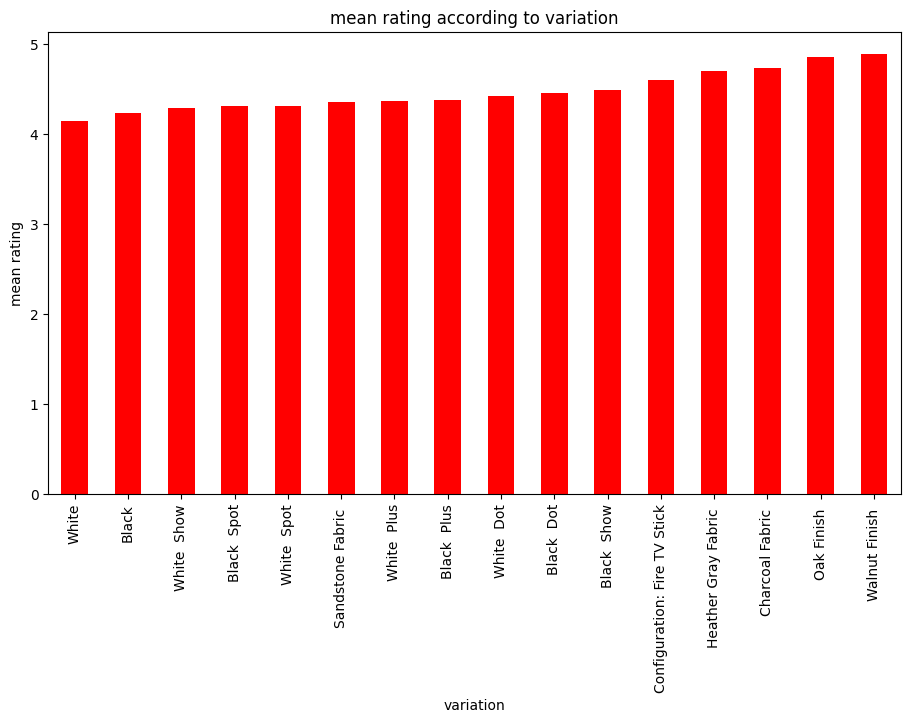

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='red',figsize=(11,6))
plt.title('mean rating according to variation')
plt.xlabel('variation')
plt.ylabel('mean rating')
plt.show()

Analyzing 'verifed_reviews' column

In [ ]:
data.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.673333
std,1.068506,0.273778,182.527177
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,166.000000
max,5.000000,1.000000,2853.000000


[Text(0.5, 1.0, 'Distribution of length of review')]

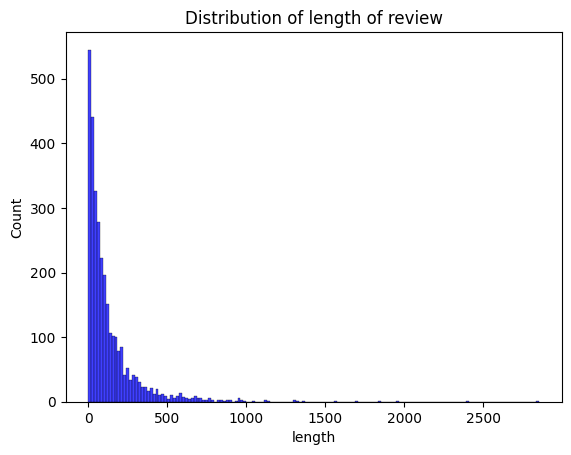

In [ ]:
# length analysis for full dataset

sns.histplot(data['length'],color='blue').set(title='Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

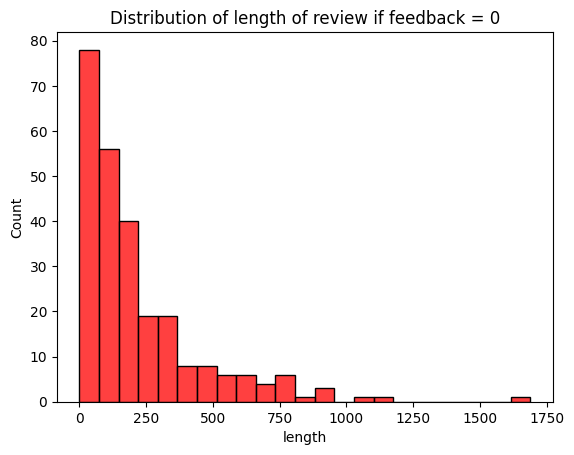

In [ ]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

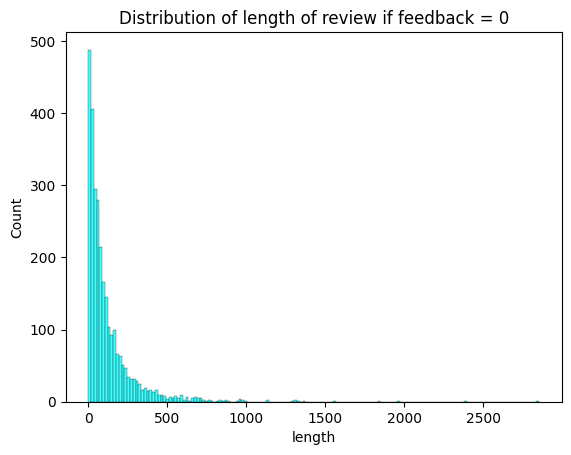

In [ ]:
sns.histplot(data[data['feedback']==1]['length'],color='Cyan').set(title='Distribution of length of review if feedback = 0')

Lengthwise mean rarting

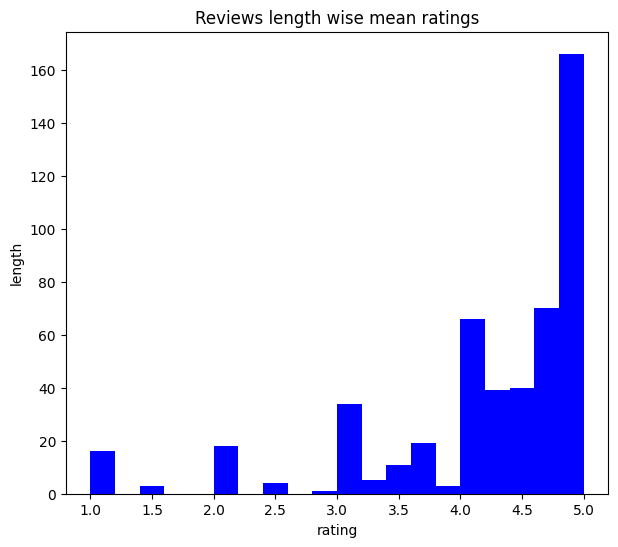

In [ ]:
data.groupby('length')['rating'].mean().plot.hist(color='blue', figsize=(7,6),bins=20)
plt.title('Reviews length wise mean ratings')
plt.xlabel('rating')
plt.ylabel('length')
plt.show()

In [ ]:
cv = CountVectorizer(stop_words='english')
words= cv.fit_transform(data.verified_reviews)

In [ ]:
# # combine all the reviews
# reviews=" ".join([review for review in data['verified_reviews']])



# #  initiallize wordcloud object
# wc=WordCloud(background_color='white',max_words=50)
# # generate and plot wordcloud
# plt.figure(figsize=(10,10))
# plt.imshow(wc.generate(reviews))
# plt.title('Workcloud for all reviews',fontsize=10)
# plt.axis('off')
# plt.show()



In [ ]:
# combine all reviews for each feedback caegory and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews=neg_reviews.lower().split()
print('negative_reviews: \n',neg_reviews)

pos_reviews= " ".join([review for review in data[data["feedback"]==1]['verified_reviews']])
pos_reviews=pos_reviews.lower().split()
print('\npositive_reviews: \n',pos_reviews)

# finding words from reviews which are present in that feedback category only
# 1st finding for negative reviews words of feedback == 0 category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)
print('\n only_negative_reviews: \n',unique_negative)

# 1st finding for positive reviews words of feedback == 1 category only
unique_positive =[x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)
print('\n only_positive_reviews: \n',unique_positive)





negative_reviews: 
 ['"it\'s', 'like', 'siri,', 'in', 'fact,', 'siri', 'answers', 'more', 'accurately', 'then', 'alexa.', 'i', "don't", 'see', 'a', 'real', 'need', 'for', 'it', 'in', 'my', 'household,', 'though', 'it', 'was', 'a', 'good', 'bargain', 'on', 'prime', 'day', 'deals."', 'sound', 'is', 'terrible', 'if', 'u', 'want', 'good', 'music', 'too', 'get', 'a', 'bose', 'not', 'much', 'features.', '"stopped', 'working', 'after', '2', 'weeks', ",didn't", 'follow', 'commands!?', 'really', 'fun', 'when', 'it', 'was', 'working?"', 'sad', 'joke.', 'worthless.', '"really', 'disappointed', 'alexa', 'has', 'to', 'be', 'plug-in', 'to', 'wall', 'socket', 'all', 'the', 'time.', 'my', 'fault', 'for', 'not', 'checking', 'this,', 'but', 'made', 'the', 'assumption', 'that', 'a', 'company', 'has', 'technologically', 'advanced', 'as', 'amazon', 'would', 'sell', 'this', 'product', 'with', 'a', 'rechargeable', 'battery.', 'if', 'i', 'could', 'return', 'it,', 'i', 'would', 'as', 'my', 'apple', 'music', 'a

In [ ]:
# wc= WordCloud(background_color='white',max_words=50)

# # generate and plot WordCloud
# plt.figure(figsize=(10,10))
# plt.imshow(wc.generate(unique_negative))
# plt.title('WordCloud for negative reviews', fontsize=15)
# plt.axis('on')    # here we can use "on/off"
# plt.show()

In [ ]:
# wc= WordCloud(background_color='white',max_words=50)

# # generate and plot WordCloud
# plt.figure(figsize=(10,10))
# plt.imshow(wc.generate(unique_positive))
# plt.title('WordCloud for positive reviews', fontsize=15)
# plt.axis('off')    # here we can use "on/off"
# plt.show()

**Preprocessing and modelling**

to build the corpus from the 'verified_reviews' we perform the following

1. Replace any non alphabet character with space
2.Convert to lower case and split into words
3 Iterate over the individual words and if it is not a stoppedword then add the stemmed form of the word to the corpus


In [ ]:
corpus=[]
stemmer = PorterStemmer() # it remove perfix and sufix from the word
for i in range(0,data.shape[0]):
  review=re.sub('[^a-zA-Z]',' ',data.iloc[i]['verified_reviews'])  # this line  only the give the words using of leteer with  'a-zA-Z'
  review = review.lower().split()  # it convert all word in lowercase and split a string into a list of substrings based on a delimiter
  review=[stemmer.stem(word) for word in review if not word in STOPWORDS] # first it run for loop to remove stopword from review and save in word and then with stemmer it remove prefix and sufix from word
  review= " ".join(review)
  corpus.append(review)
print(corpus)

['love echo', 'love', 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home', 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well', 'music', 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els', 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet', 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous', 'look great', 'love listen song heard sinc childhood get news weather inform great', 'sent year old dad talk constantli', 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time', 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing alexa play song

**using Count Vectorizer TO CREATE bag of words**

CountVectorizer is a feature extraction technique used in natural language processing (NLP) and text mining. It's a part of the scikit-learn library in Python and is used to ***convert a collection of text documents into a matrix of token counts.***

Here's a basic explanation of how CountVectorizer works:
1. **Tokenization:**
2. **vocabulary Building:** build a vocabulary of all unique words
3. **counting occurance:** counts the occurrences of each token in the document and stores these counts in a sparse matrix.
4.**Sparse Matrix Representation:**where each row represents a document from the input corpus, and each column represents a unique token from the vocabulary. The matrix contains the counts of each token in each document.



In [ ]:
cv=CountVectorizer(max_features= 2500)

# Storing independent amd dependent variable in x and y
x = cv.fit_transform(corpus).toarray()
y=data['feedback'].values
print (x[2600])
print(corpus[24])
print (y)

[0 0 0 ... 0 0 0]
got second unit bedroom expect sound improv didnt realli see differ overal big improv st gener
[1 1 1 ... 1 1 1]


**pickle.dump()** is a function in Python's pickle module used to serialize (convert objects into byte streams) and save Python objects to a file. This allows you to store Python objects persistently and retrieve them

Here's a brief explanation of how pickle.dump() works:

**Serialization:** The pickle.dump() function serializes a Python object into a byte stream, which can then be written to a file or transmitted over a network.

**File Writing:** After serialization, pickle.dump() writes the serialized byte stream to a file specified by the file object passed as an argument.

**Usage:** pickle.dump() is typically used in conjunction with open() to create or open a file in binary write mode ('wb') and then write the serialized object to that file.


In [ ]:
#  Saving the count Vectorizer
pickle.dump(cv, open('/content/drive/MyDrive/end_end_Project /Sentiment Analysis/Models/countVectorizer.pkl','wb'))


In [ ]:
# Checking shape of x and y
print(f"X shape: ,{x.shape}")
print(f"Y shape: ,{y.shape}")

X shape: ,(3150, 2500)
Y shape: ,(3150,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

print(f"X train: {x_train.shape}")
print(f"X test: {x_test.shape}")
print(f"Y train: {y_train.shape}")
print(f"Y test: {x_test.shape}")

X train: (2205, 2500)
X test: (945, 2500)
Y train: (2205,)
Y test: (945, 2500)


In [ ]:
print(f"X train max value: {x_train.max()}")
print(f"X test max value: {x_test.max()}")


X train max value: 12
X test max value: 10


In [ ]:
scaler =MinMaxScaler()

x_train_sc1= scaler.fit_transform(x_train)
x_test_sc1=scaler.fit_transform(x_test)
print(x_train_sc1[1])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
#saving the scalar model
pickle.dump(scaler,open("/content/drive/MyDrive/end_end_Project /Sentiment Analysis/Models/scaler.pkl",'wb'))

Random Forest

In [ ]:
#  fitting scaled x_train and y_traain on random forest classifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train_sc1,y_train)


RandomForestClassifier()

In [ ]:
# Accuracy of the model on training and testing data

print('Training Accuracy :', model_rf.score(x_train_sc1,y_train))
print('Testing Accuracy :',model_rf.score(x_test_sc1,y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9375661375661376


In [ ]:
# predicting on the test set
y_predict=model_rf.predict(x_test_sc1)


In [ ]:
# confusion metrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predict)

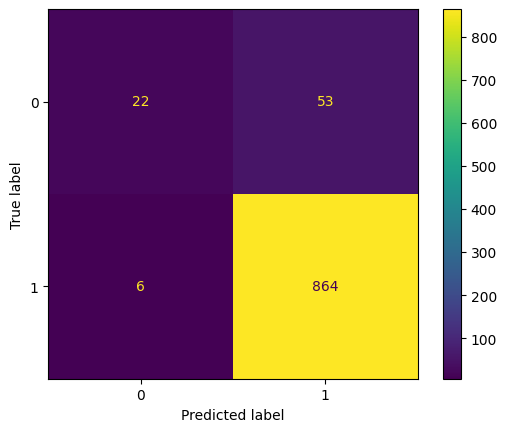

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you have already computed the confusion matrix `cm` and have access to the model's classes
# cm = confusion matrix
# model_rf.classes_ = classes of the model (e.g., ['class1', 'class2', ...])

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()

**K fold cross_validation**

In [ ]:
accuracies=cross_val_score(estimator=model_rf,X=x_train_sc1,y=y_train,cv=10)
print('Accuracy :',accuracies.mean())
print('Standard Variance', accuracies.std())

**Applying grid search to get optimal parameters on random forest**

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

cv_object = StratifiedKFold(n_splits=2)

# Define the parameter grid
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30,80,100],
    'min_samples_split': [ 5, 8, 10,12]
}

# Create the random forest classifier
model_rf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=model_rf, param_grid=params, cv=cv_object, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(x_train_sc1, y_train.ravel())


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 80, 100],
                         'min_samples_split': [5, 8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [ ]:
print('best Parameter Combination : {}'.format(grid_search.best_params_))

best Parameter Combination : {'max_depth': 100, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
print('Cross validation mean accuracy on train set: {}'.format(grid_search.cv_results_['mean_train_score'].mean()*100))
print('Cross validation mean accuracy on test set: {}'.format(grid_search.cv_results_['mean_test_score'].mean()*100))
print('Accuracy score for test set :',accuracy_score(y_test,y_predict))

Cross validation mean accuracy on train set: 95.1566275005361
Cross validation mean accuracy on test set: 92.01880122352335
Accuracy score for test set : 0.9375661375661376


**XgBoost**

In [ ]:
model_xgb=XGBClassifier()
model_xgb.fit(x_train_sc1,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Accuracy of the model on training and testing data

print('Training Accuracy :',model_xgb.score(x_train_sc1,y_train))
print('Testing Accuracy :',model_xgb.score(x_test_sc1,y_test))

Training Accuracy : 0.9700680272108844
Testing Accuracy : 0.9343915343915344


In [ ]:
y_preds=model_xgb.predict(x_test_sc1)

In [ ]:
cm=confusion_matrix(y_test,y_preds)
cm

array([[ 20,  55],
       [  7, 863]])

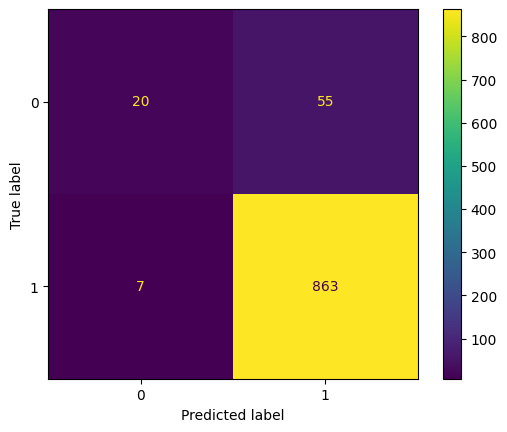

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
cm_display.plot()

In [ ]:
# savong the XGBoost classifier
pickle.dump(model_xgb,open('/content/drive/MyDrive/end_end_Project /Sentiment Analysis/Models/model_xgb.pkl','wb'))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler

def predict_sentiment(texts):
    cv=CountVectorizer(max_features= 2500)
    corpus = []
    stemmer = PorterStemmer()  # Initialize the stemmer

    # Iterate over each text in the texts list
    for text in texts:
        # Preprocess each text
        review = re.sub('[^a-zA-Z]',' ',text)  # Remove non-alphabetic characters
        review = review.lower().split()  # Convert to lowercase and split into words
        review = [stemmer.stem(word) for word in review if word not in STOPWORDS]  # Apply stemming and remove stopwords
        review = " ".join(review)  # Join the processed words back into a single string
        corpus.append(review)  # Add the processed text to the corpus list

    # Transform the corpus into CountVectorizer features
    text_features = cv.fit_transform(corpus).toarray()
    if text_features.shape[1] < 2500:
        padding = np.zeros((text_features.shape[0], 2500 - text_features.shape[1]))
        text_features = np.concatenate((text_features, padding), axis=1)
    elif text_features.shape[1] > 2500:
        text_features = text_features[:, :2500]

    # Ensure that the scaler is applied consistently
    text_features = scaler.transform(text_features)  # Assuming scaler is your scaler object

    # Predict sentiment using the XGBoost classifier
    predictions = model_xgb.predict(text_features)  # Assuming model_xgb is your XGBoost classifier

    # Convert predictions into sentiment labels (Negative or Positive)
    sentiments = ["Negative" if pred == 0 else "Positive" for pred in predictions]

    return sentiments


# Example usage
texts = ["got second unit bedroom expect sound improv didnt realli see differ overal big improv st gener"]

sentiments = predict_sentiment(texts)
print("Text:", sentiments)



Text: ['Positive']


**Decision Tree Classifier**

In [ ]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train_sc1,y_train)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy :",model_dt.score(x_train_sc1,y_train))
print("Testing Accuracy :",model_dt.score(x_test_sc1,y_test))


Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9005291005291005


In [ ]:
y_pred=model_dt.predict(x_test_sc1)

In [ ]:
cm=confusion_matrix(y_test,y_preds)
print(cm)

[[ 20  55]
 [  7 863]]


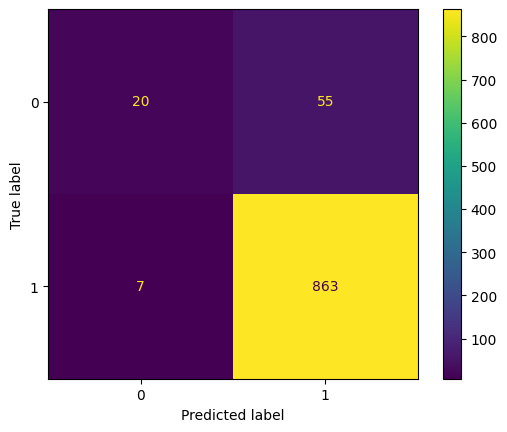

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
cm_display.plot()